# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fajar Al Najiim
- **Email:** fajaralnajiim09@gmail.com
- **ID Dicoding:** fajaral14

## Menentukan Pertanyaan Bisnis

- Apakah cuaca mempengaruhi konsumen untuk menyewa sepeda?
- Apakah benar mayoritas konsumen menikmati hari minggunya untuk bersepeda?
- Bulan apa persewaan sepeda ramai pengunjung?

## Import Semua Packages/Library yang Digunakan

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Dataset Bike Day

In [152]:
bike_day = pd.read_csv("data/day.csv")
bike_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Dataset Bike Hour

In [153]:
bike_hour = pd.read_csv("data/hour.csv")
bike_hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

Cek Dataset Bike Day

In [154]:
# Cek informasi umum yang ada pada dataset
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [155]:
# Cek Missing Value
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [156]:
# Cek Duplikasi Nilai
bike_day.duplicated().sum()

0

In [157]:
# Statistik per kolom Dataset
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [158]:
# Cek informasi umum dataset
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [159]:
# Cek missing value
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [160]:
# Cek duplikasi nilai
bike_hour.duplicated().sum()

0

In [161]:
# Statistik perkolom dataset
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jika dilihat dari kolomnya, ada beberapa kolom yang dapat digabung menjadi 1 kolom. Selain itu, ada beberapa nama kolom yang disingkat sehingga dapat membuat sebagian tidak dapat memahami apa arti kolom tersebut

### Cleaning Data

Mengubah tipe data dari kolom dteday

In [162]:
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

Data Day

In [163]:
# Rename nama kolom
bike_day.rename(columns={
    "dteday" : "date", 
    "yr" : "year", 
    "mnth" : "month", 
    "weathersit" : "weather", 
    "temp" : "temperature",
    "hum" : "humidity", 
    "cnt" : "total"
    }, inplace=True
)

Konversi beberapa kolom yang bersifat kategorikal

In [164]:
# Konversi nilai kolom season
bike_day['season'] = bike_day['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Konversi nilai kolom year
bike_day['year'] = bike_day['year'].replace({0: "2011", 1: "2012"})

# Konversi nilai kolom month
bike_day['month'] = bike_day['month'].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

# Konversi nilai kolom weekday
bike_day['weekday'] = bike_day['weekday'].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

# Konversi nilai kolom workingday
bike_day['workingday'] = bike_day['workingday'].replace({0: "Holiday", 1: "Working Day"})

# Konversi nilai kolom weather
bike_day['weather'] = bike_day['weather'].replace({1: "Clear", 2: "Fog", 3: "Light Rain", 4: "Heavy Rain"})

bike_day.sample(5)


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total
139,140,2011-05-20,Summer,2011,May,0,Saturday,Working Day,Clear,0.536667,0.529042,0.719583,0.125013,909,4008,4917
275,276,2011-10-03,Winter,2011,October,0,Tuesday,Working Day,Fog,0.384167,0.392046,0.760833,0.083346,330,3240,3570
678,679,2012-11-09,Winter,2012,November,0,Saturday,Working Day,Clear,0.361667,0.355413,0.540833,0.214558,709,5283,5992
519,520,2012-06-03,Summer,2012,June,0,Monday,Holiday,Clear,0.602500,0.575133,0.493333,0.184087,2494,5147,7641
111,112,2011-04-22,Summer,2011,April,0,Saturday,Working Day,Fog,0.336667,0.321954,0.729583,0.219521,177,1506,1683


Data Hour

In [165]:
# Rename nama kolom
bike_hour.rename(columns={
    "dteday" : "date", 
    "yr" : "year", 
    "mnth" : "month", 
    "hr" : "hour",
    "weathersit" : "weather", 
    "temp" : "temperature",
    "hum" : "humidity", 
    "cnt" : "total"
    }, inplace=True
)

In [166]:
# Konversi nilai kolom season
bike_hour['season'] = bike_hour['season'].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Konversi nilai kolom year
bike_hour['year'] = bike_hour['year'].replace({0: "2011", 1: "2012"})

# Konversi nilai kolom month
bike_hour['month'] = bike_hour['month'].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"})

# Konversi nilai kolom weekday
bike_hour['weekday'] = bike_hour['weekday'].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

# Konversi nilai kolom workingday
bike_hour['workingday'] = bike_hour['workingday'].replace({0: "Holiday", 1: "Working Day"})

# Konversi nilai kolom weather
bike_hour['weather'] = bike_hour['weather'].replace({1: "Clear", 2: "Fog", 3: "Light Rain", 4: "Heavy Rain"})


bike_hour.sample(5)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total
11964,11965,2012-05-18,Summer,2012,May,17,0,Saturday,Working Day,Clear,0.66,0.6212,0.34,0.1343,124,688,812
153,154,2011-01-07,Spring,2011,January,16,0,Saturday,Working Day,Fog,0.20,0.2121,0.37,0.1642,5,82,87
12839,12840,2012-06-24,Fall,2012,June,4,0,Monday,Holiday,Fog,0.66,0.6212,0.65,0.0000,4,9,13
12482,12483,2012-06-09,Summer,2012,June,7,0,Sunday,Holiday,Clear,0.58,0.5455,0.64,0.1045,26,61,87
2111,2112,2011-04-02,Summer,2011,April,20,0,Sunday,Holiday,Clear,0.34,0.3182,0.53,0.2836,29,56,85


Data yang sudah dibersihkan ini nantinya akan digunakan pada bagian Visualization & Explanatory Analysis.

In [167]:
# simpan ke csv
bike_day.to_csv('dashboard/cleaned_day.csv', index=False)
bike_hour.to_csv('dashboard/cleaned_hour.csv', index=False)

## Exploratory Data Analysis (EDA)

#### Korelasi antar kolom

Karena pada tahap sebelumnya value pada beberapa kolom dataset telah diubah, maka data awal akan digunakan lagi. **_Kondisi dataset setelah dilakukan tahapan cleaning masih sama dengan kondisi awal database._**

In [168]:
start_day = pd.read_csv("data/day.csv")
start_hour = pd.read_csv("data/hour.csv")

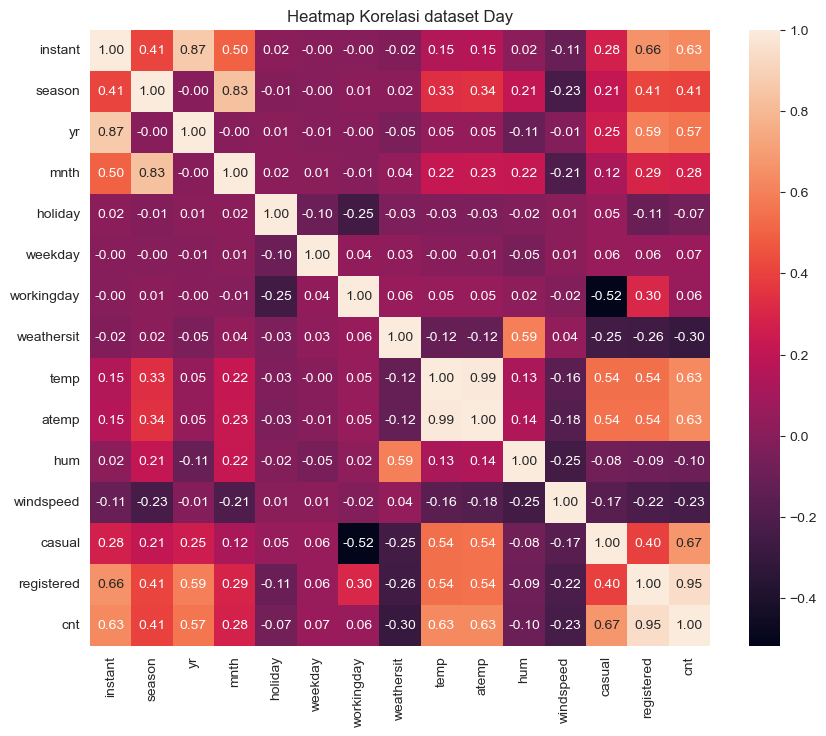

In [169]:
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(start_day.corr(), annot=True, fmt='.2f')
plt.title('Heatmap Korelasi dataset Day')  # Menambahkan judul
plt.show()

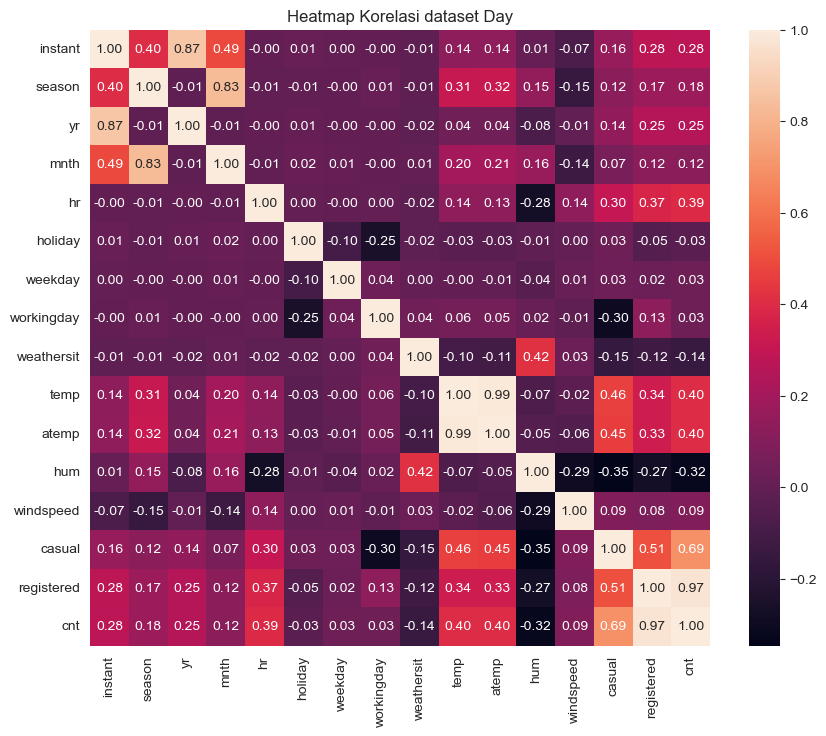

In [170]:
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar
sns.heatmap(start_hour.corr(), annot=True, fmt='.2f')
plt.title('Heatmap Korelasi dataset Day')  # Menambahkan judul
plt.show()

### Histogram

**_Ket : sumbu x merupakan value yang ada pada kolom tersebut. sumbu y merupakan banyaknya data_**

Dataset Day

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weathersit'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>]],
      dtype=object)

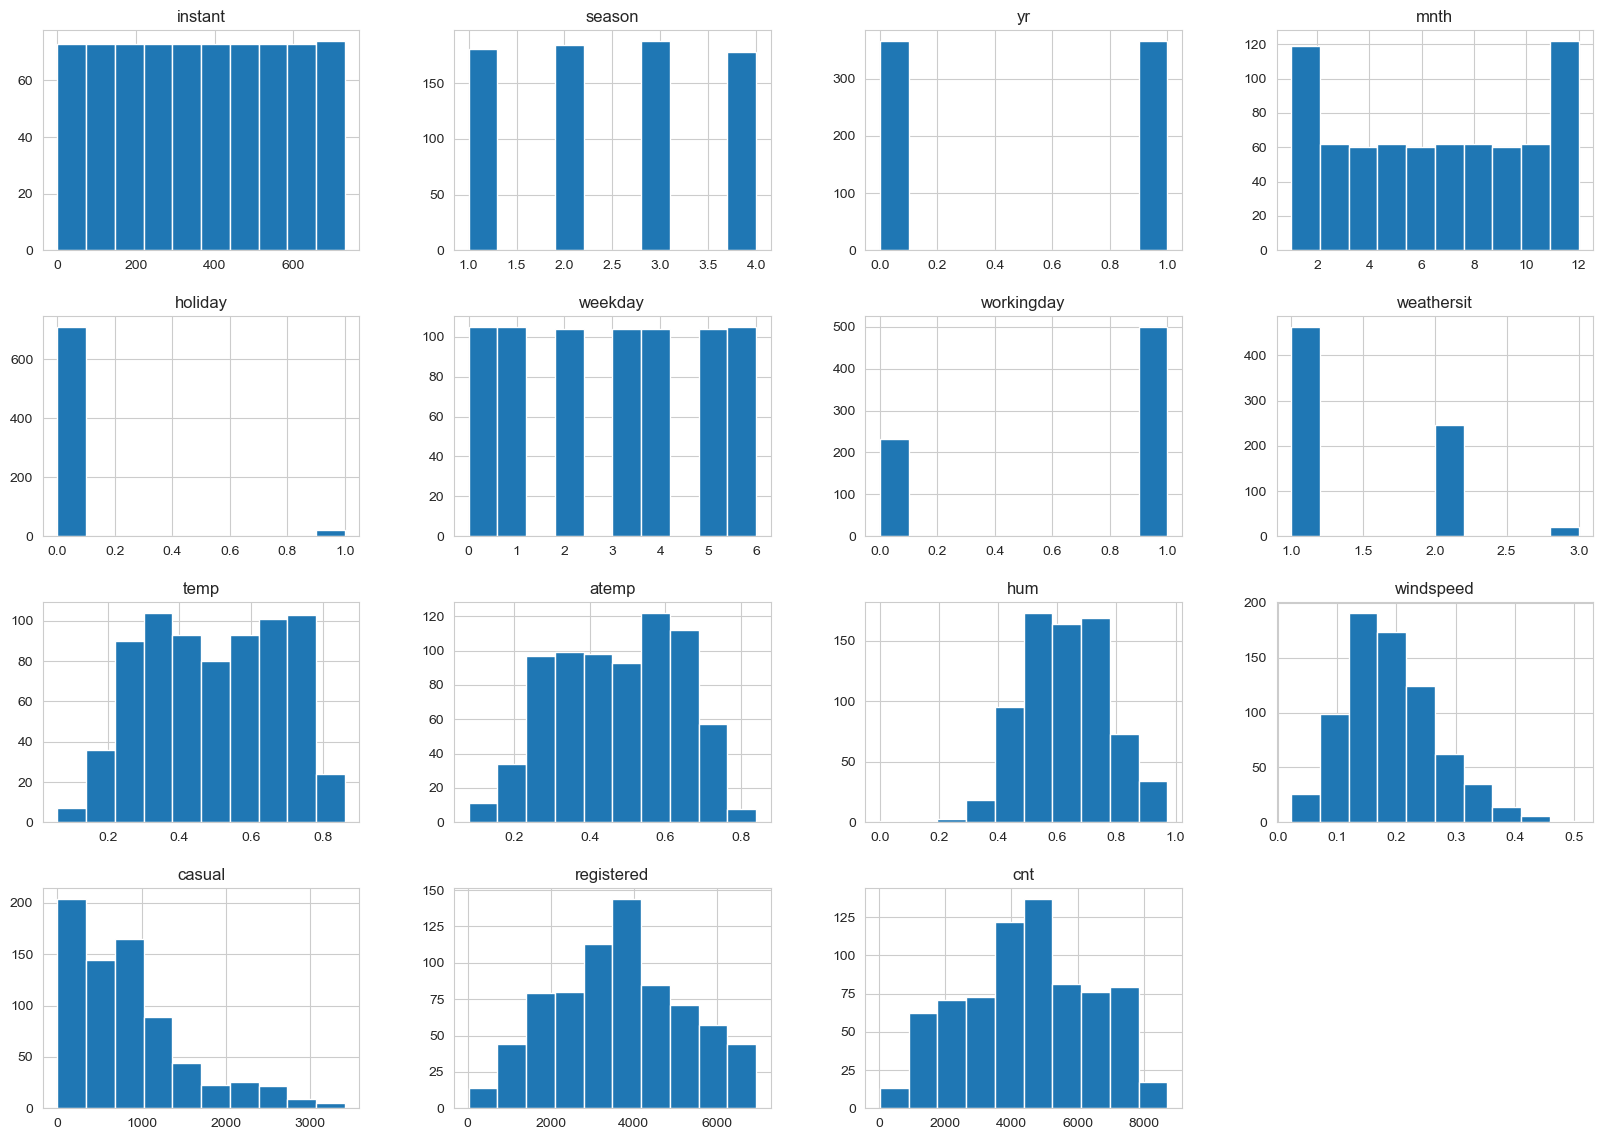

In [171]:
# Menampilkan distribusi data 
start_day.hist(figsize=(20,14))

Dataset Hour

array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

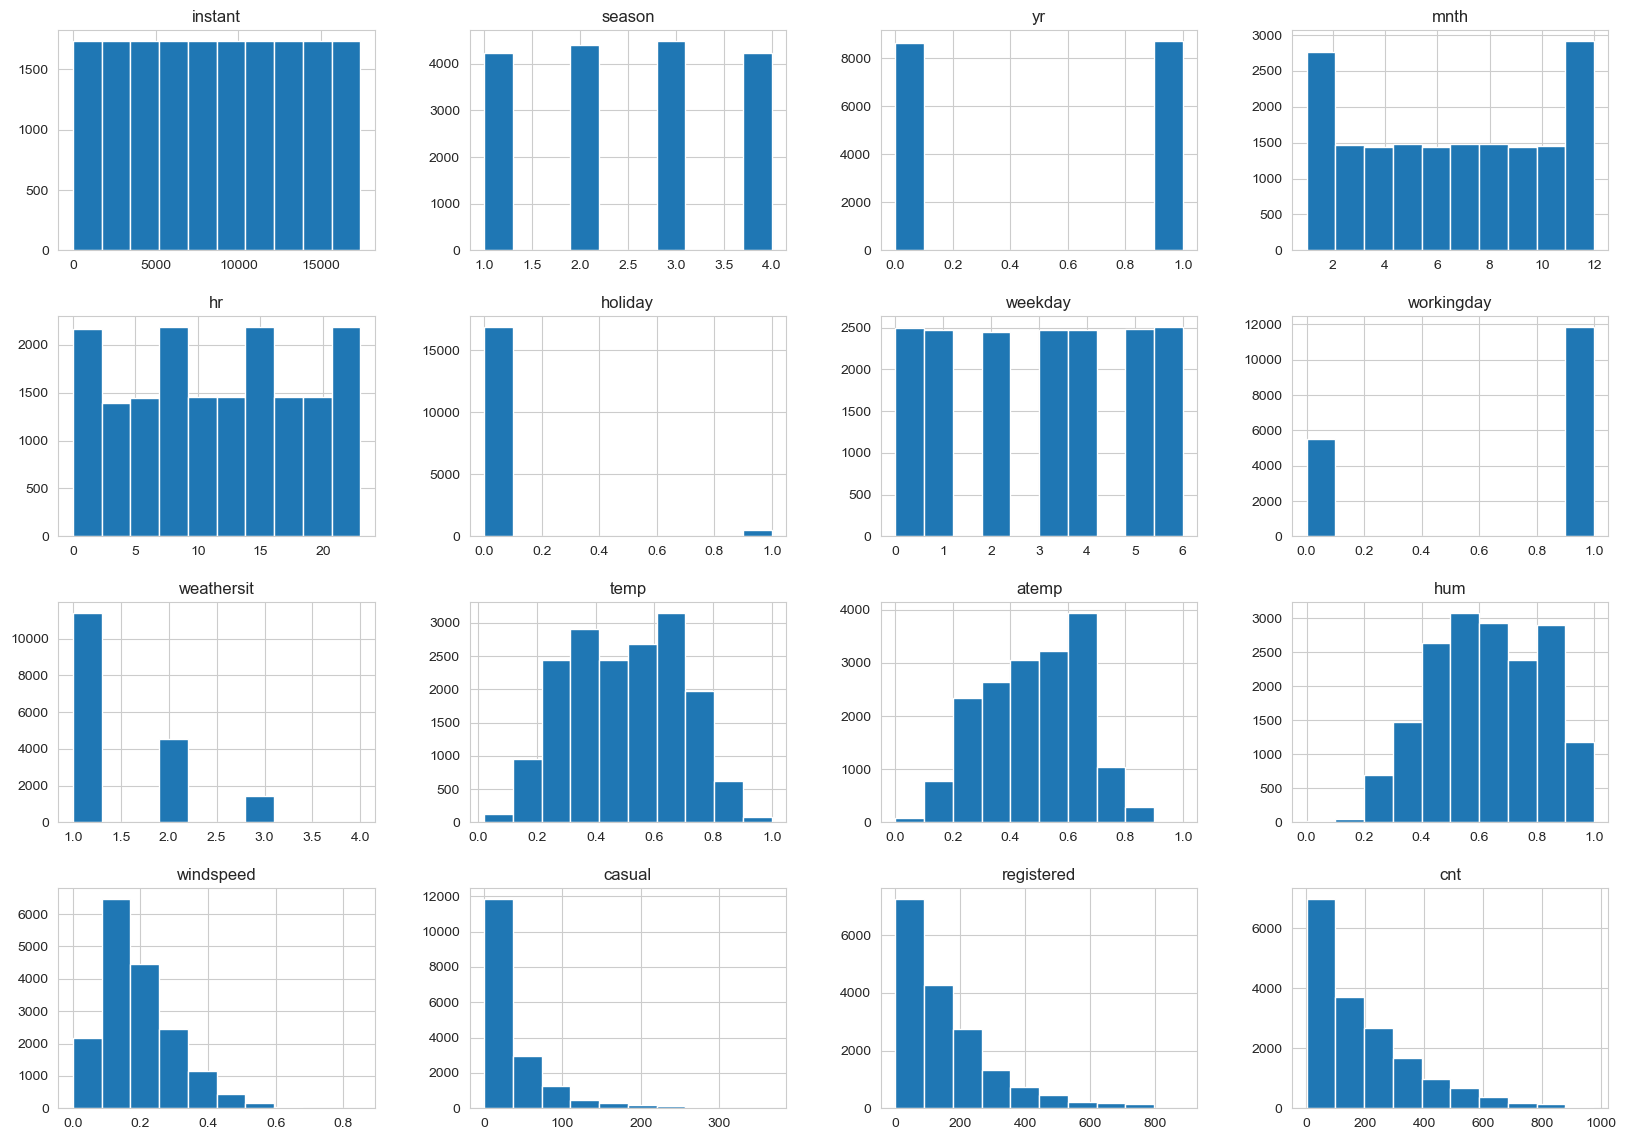

In [172]:
# Menampilkan distribusi data 
start_hour.hist(figsize=(20,14))

### Statistik dan Outlier

Dataset Day

In [173]:
# Melihat statistik deskriptif
start_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


<AxesSubplot:>

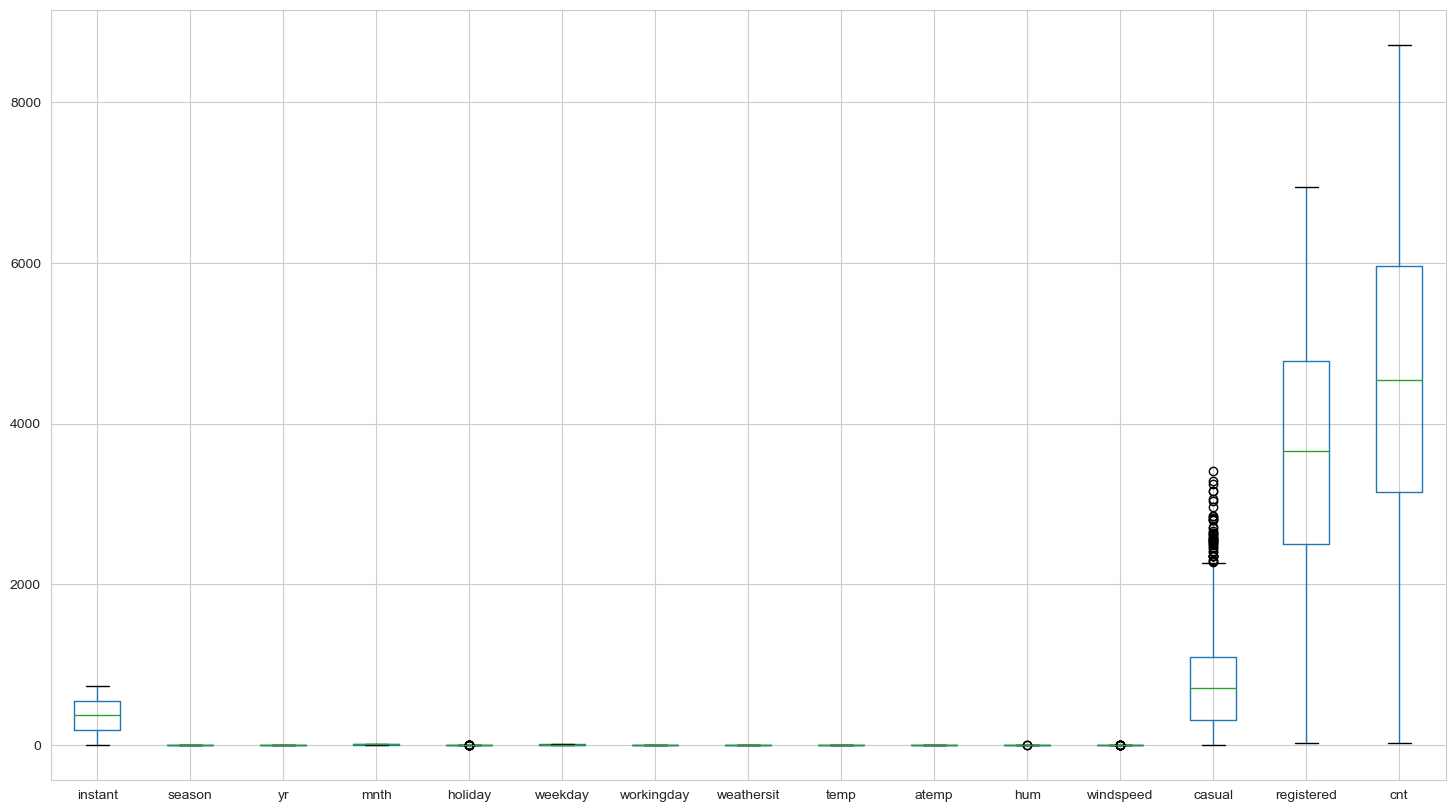

In [174]:
# membuat boxplot untuk visualisasi outlier
plt.figure(figsize=(18, 10))  # Mengatur ukuran gambar
start_day.boxplot()

Dataset Hour

In [175]:
# melihat statistik deskriptif
start_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


<AxesSubplot:>

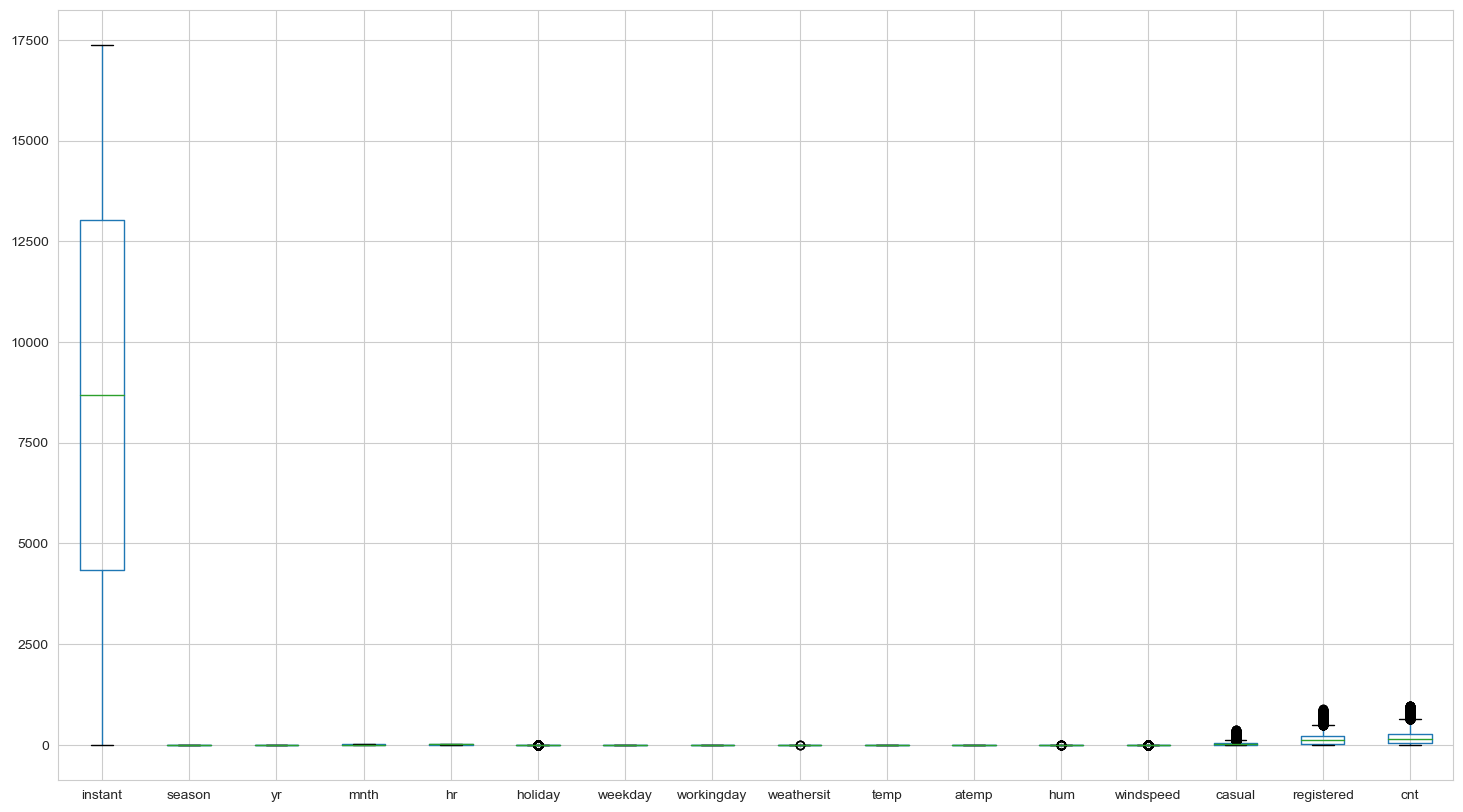

In [176]:
# membuat boxplot untuk visualisasi outlier
plt.figure(figsize=(18, 10))  # Mengatur ukuran gambar
start_hour.boxplot()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah cuaca mempengaruhi konsumen untuk menyewa sepeda?

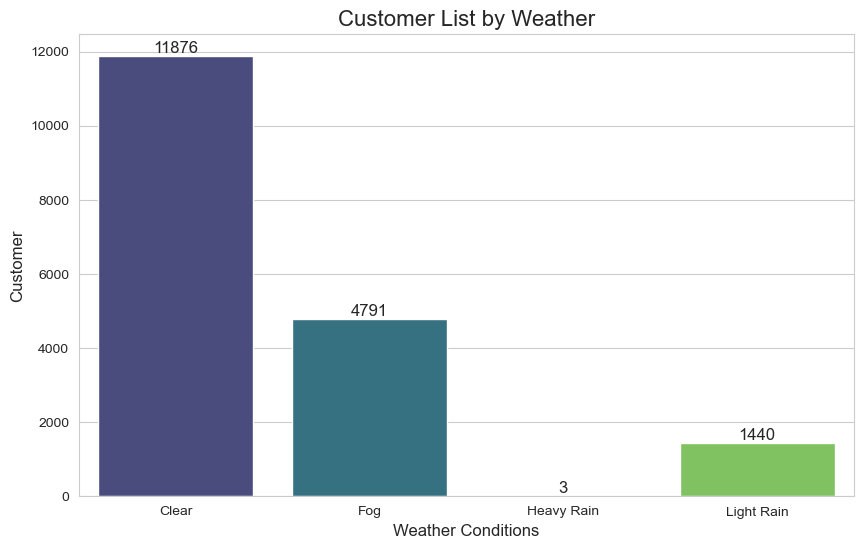

In [177]:
day_count_user = bike_day['weather'].value_counts().sort_index()
hour_count_user = bike_hour['weather'].value_counts().sort_index()

# Menyamakan indeks dengan reindex()
day_count_user = day_count_user.reindex(hour_count_user.index, fill_value=0).astype(int)

total = day_count_user + hour_count_user

# BUat plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=total.index, y=total.values, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Customer List by Weather', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Customer', fontsize=12)

# Menambahkan label angka di atas setiap bar
for i, count in enumerate(total.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

Terlihat bahwa grafik diatas menunjukkan banyak pengunjung datang menyewa sepeda dalam kondisi cuaca cerah. Ada 4971 orang menyewa sepeda pada saat cuaca berkabut. Untuk cuaca gerimis, ada 1440 orang menyewa sepeda. Sementara itu, hanya ada 3 orang yang menyewa sepeda pada saat hujan lebat

### Pertanyaan 2: Apakah benar mayoritas konsumen menikmati hari minggunya untuk bersepeda?

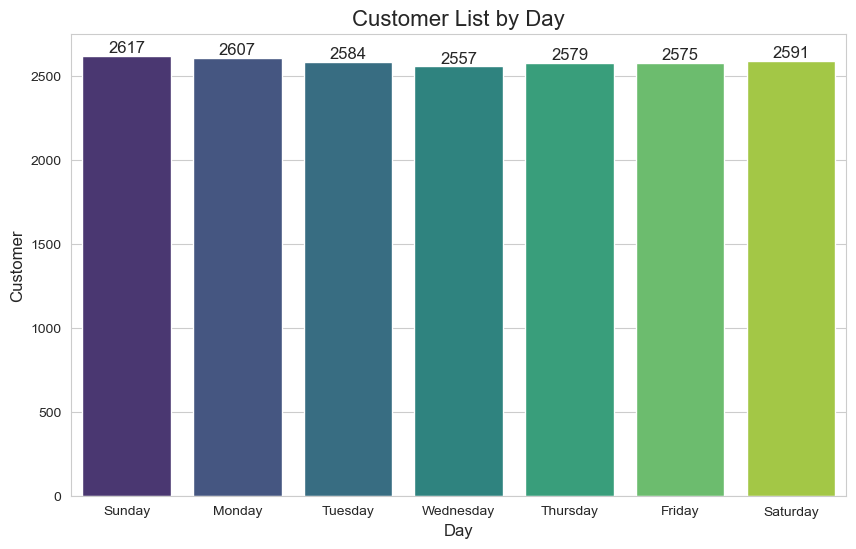

In [178]:
# Digunakan untuk mengurutkan hari
months_ordered = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
bike_day['weekday'] = pd.Categorical(bike_day['weekday'], categories=months_ordered, ordered=True)
bike_hour['weekday'] = pd.Categorical(bike_hour['weekday'], categories=months_ordered, ordered=True)

week_day_count = bike_day['weekday'].value_counts().sort_index()
week_hour_count = bike_hour['weekday'].value_counts().sort_index()
# Menyamakan indeks dengan reindex()
week_day_count = week_day_count.reindex(week_hour_count.index, fill_value=0).astype(int)

total_week = week_day_count + week_hour_count

# BUat plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=total_week.index, y=total_week.values, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Customer List by Day', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Customer', fontsize=12)

# Menambahkan label angka di atas setiap bar
for i, count in enumerate(total_week.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

Dari tahun 2011 hingga 2012, rata-rata total pengunjung tiap harinya berkisar dari 2557 hingga 2617. Pengunjung banyak datang pada hari Minggu karena pada hari itu mayoritas pengunjung ingin bersantai di hari Minggunya dengan bersepeda

### Pertanyaan 3:  Bulan apa persewaan sepeda ramai pengunjung?

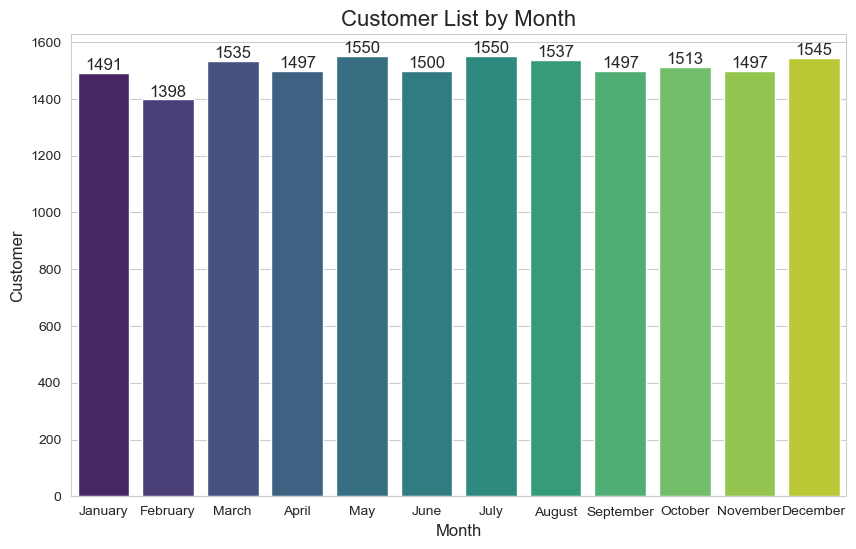

In [179]:
# Digunakan untuk mengurutkan bulan
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bike_day['month'] = pd.Categorical(bike_day['month'], categories=months_ordered, ordered=True)
bike_hour['month'] = pd.Categorical(bike_hour['month'], categories=months_ordered, ordered=True)

monthD_count_user = bike_day['month'].value_counts().astype(int).sort_index()
monthH_count_user = bike_hour['month'].value_counts().astype(int).sort_index()

total_month = monthD_count_user + monthH_count_user

# BUat plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=total_month.index, y=total_month.values, palette='viridis')

# Menambahkan judul dan label sumbu
plt.title('Customer List by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Customer', fontsize=12)

# Menambahkan label angka di atas setiap bar
for i, count in enumerate(total_month.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

Dalam kurun waktu 2011 hingga 2012, bulan Mei dan Juli menunjukkan grafik tertinggi, yang artinya banyak orang datang pada bulan Mei dan Juli. 

## Conclusion

**1. Apakah cuaca mempengaruhi konsumen untuk menyewa sepeda?**
- Jawaban: Tentu, berdasarkan grafik Customer list by weather menunjukkan bahwa konsumen datang pada saat cuaca cerah dan menghindari cuaca hujan lebat



**2. Apakah benar mayoritas konsumen menikmati hari minggunya untuk bersepeda?**
- Jawaban: Ya, mayoritas konsumen menikmati hari minggu untuk bersepeda. Hal ini dapat dilihat di grafik Customer List by Day

**3. Bulan apa persewaan sepeda ramai pengunjung?**
- Jawaban: berdasarkan grafik Customer List by Month, dapat dilihat bahwa pengunjung terbanyak datang pada bulan Mei dan Juli